In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("KKR.csv")
#Predicted_11=pd.DataFrame(columns=['Name','Country','Role'])
df.index=df.index + 1#change of indexing
df['Name']=df['Name'].map(lambda x: str(x)[:-12])#characters removal
df['Average'][df['Average'] == '-'] = None
df['Average'] = df['Average'].astype(float)
df['Strike Rate'][df['Strike Rate'] == '-'] = None
df['Strike Rate'] = df['Strike Rate'].astype(float)
df['Wickets'][df['Wickets'] == '-'] = None
df['Wickets'] = df['Wickets'].astype(float)
df['Economy'][df['Economy'] == '-'] = None
df['Economy'] = df['Economy'].astype(float)
df['Runs'][df['Runs'] == '-'] = 0
df['Runs'] = df['Runs'].astype(int)
df['Bowling Average'][df['Bowling Average'] == '-'] = None
df['Bowling Average'] = df['Bowling Average'].astype(float)
df['Bowling Strike Rate'][df['Bowling Strike Rate'] == '-'] = None
df['Bowling Strike Rate'] = df['Bowling Strike Rate'].astype(float)
df.insert(loc=7 , column="Batting Rate",value=df['Average'] + df['Strike Rate'])
df.loc[df.Role == "Bowler", "Batting Rate"] = None
df.loc[df.Role == "Spin bowler", "Batting Rate"] = None
df.insert(loc=12 , column="Bowling Rate",value=(df['Bowling Average'] + df['Bowling Strike Rate'] +df['Economy']).rdiv(1000).round(2))
df.loc[df.Role == "Batsman", "Bowling Rate"] = None
df.loc[df.Role == "Opening batsman", "Bowling Rate"] = None
df.loc[df.Role == "Wicketkeeper batsman", "Bowling Rate"] = None
df.loc[df.Role == "Opening Wicketkeeper batsman", "Bowling Rate"] = None
df.insert(loc=13 , column="Allrounder's Rate",value=df['Runs']+df['Wickets']+df['Strike Rate'] + df['Economy'].rdiv(100))
df.loc[df.Role == "Batsman", "Allrounder's Rate"] = None
df.loc[df.Role == "Opening batsman", "Allrounder's Rate"] = None
df.loc[df.Role == "Wicketkeeper batsman", "Allrounder's Rate"] = None
df.loc[df.Role == "Opening Wicketkeeper batsman", "Allrounder's Rate"] = None
df.loc[df.Role == "Bowler", "Allrounder's Rate"] = None
df.loc[df.Role == "Spin bowler", "Allrounder's Rate"] = None
df["Allrounder's Rate"]=df["Allrounder's Rate"].round(2)
df

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

,Name,Country,Role,Matches,Runs,Average,Strike Rate,Batting Rate,Wickets,Bowling Average,Bowling Strike Rate,Economy,Bowling Rate,Allrounder's Rate
1,Rahul Tripathi,India,Opening batsman,72,1501,25.87,129.95,155.82,12.0,23.41,18.5,7.59,NaN,NaN
2,Tom Banton,England,Opening Wicketkeeper batsman,34,944,30.45,157.33,187.78,NaN,NaN,NaN,NaN,NaN,NaN
3,Shubman Gill,India,Batsman,37,777,33.78,134.89,168.67,NaN,NaN,NaN,NaN,NaN,NaN
4,Nitish Rana,India,Batsman,96,2110,27.40,135.43,162.83,26.0,20.38,17.5,6.98,NaN,NaN
5,Rinku Singh,India,Batsman,53,763,20.62,137.97,158.59,2.0,45.00,21.0,12.85,NaN,NaN
6,Siddhesh Lad,India,Batsman,44,703,26.03,122.90,148.93,18.0,21.50,18.0,7.16,NaN,NaN
7,Eoin Morgan,England,Batsman,285,6321,27.12,132.01,159.13,NaN,NaN,NaN,NaN,NaN,NaN
8,Dinesh Karthik(c),India,Wicketkeeper batsman,288,5708,27.70,132.92,160.62,1.0,10.00,12.0,5.00,NaN,NaN
9,Nikhil Naik,India,Wicketkeeper batsman,50,899,29.96,128.24,158.20,NaN,NaN,NaN,NaN,NaN,NaN
10,Andre Russell,West Indies,Allrounder,321,5365,26.95,171.29,198.24,291.0,25.88,18.7,8.27,18.92,5839.38


In [3]:
captain_df=df.query("Name.str.endswith('(c)')")#captain


obt_df=df.query("Role == 'Opening batsman' or Role == 'Opening Wicketkeeper batsman'")#obt
obt_df.sort_values(by=(['Runs']+['Batting Rate']), inplace=True, ascending=False)
top_obt_df=obt_df.head(2)
top_obt_df.sort_values(by=["Runs"], inplace=True, ascending=False)

owk_df=obt_df.query("Role == 'Opening Wicketkeeper batsman'")#owk
obt_df=obt_df.drop(df[df.Role== 'Opening Wicketkeeper batsman'].index)

bat_df=df.query("Role == 'Batsman'")#Batsman
bat_df.sort_values(by=(['Runs']+['Batting Rate']), inplace=True, ascending=False)
top_bat_df=bat_df.head(3)
top_bat_df.sort_values(by=["Runs"], inplace=True, ascending=False)

wkb_df=df.query("Role == 'Wicketkeeper batsman'")#WKB
wkb_df.sort_values(by=['Batting Rate'], inplace=True, ascending=False)

fbw_df=df.query("Role == 'Bowler'")#Fast bowlers
fbw_df.sort_values(by=(['Wickets']+['Bowling Rate']), inplace=True, ascending=False)
top_fbw_df=fbw_df.head(3)
top_fbw_df.sort_values(by=["Wickets"], inplace=True, ascending=False)

sbw_df=df.query("Role == 'Spin bowler'")#Spin Bowlers
sbw_df.sort_values(by=(['Wickets']+['Bowling Rate']), inplace=True, ascending=False)
top_sbw_df=sbw_df.head(3)
top_sbw_df.sort_values(by=["Wickets"], inplace=True, ascending=False)

all_df=df.query("Role == 'Allrounder' or Role == 'All round spin bowler'")#All rounders
all_df.sort_values(by=["Allrounder's Rate"], inplace=True, ascending=False)
final_all_df=all_df.head(3)     
final_all_df.sort_values(by=["Runs"], inplace=True, ascending=False)


def initial_team(captain_df,owk_df,top_obt_df,top_bat_df,wkb_df,top_fbw_df,top_sbw_df,final_all_df):
    
    count_asp=0
    count_all=0

    for a in final_all_df.index:
        if(final_all_df["Role"][a] =="Allrounder"):
            count_all=count_all+1
        else:
            count_asp=count_asp+1               
            
 #combinations
    if owk_df.empty is False:
        if(captain_df.Role.any() == "Batsman"):
            top_bat_df=top_bat_df.drop(df[df.Name.str.endswith('(c)')].index)
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([owk_df.head(1),top_obt_df.head(1),captain_df,top_bat_df.head(2),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([owk_df.head(1),top_obt_df.head(1),captain_df,top_bat_df.head(2),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([owk_df.head(1),top_obt_df.head(1),captain_df,top_bat_df.head(2),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")    
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([owk_df.head(1),top_obt_df.head(1),captain_df,top_bat_df.head(2),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        elif(captain_df.Role.any() == "Opening Wicketkeeper batsman"):
            owk_df=owk_df.drop(df[df.Name.str.endswith('(c)')].index)
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")    
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        elif(captain_df.Role.any() == "Opening batsman"):
            top_obt_df=top_obt_df.drop(df[df.Name.str.endswith('(c)')].index)
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([owk_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")    
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([owk_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([owk_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([owk_df.head(1),captain_df,top_bat_df.head(3),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        elif(captain_df.Role.any() == "Wicketkeeper batsman"):
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([final_all_df.iloc[[1]],top_obt_df.head(1),top_bat_df.head(3),captain_df,final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")    
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([final_all_df.iloc[[1]],top_obt_df.head(1),top_bat_df.head(3),captain_df,final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([final_all_df.iloc[[1]],top_obt_df.head(1),top_bat_df.head(3),captain_df,final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([final_all_df.iloc[[1]],top_obt_df.head(1),top_bat_df.head(3),captain_df,final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        else:
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")    
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
    else:
        if(captain_df.Role.any() == "Batsman"):
            top_bat_df=top_bat_df.drop(df[df.Name.str.endswith('(c)')].index)
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([top_obt_df.head(2),captain_df,top_bat_df.head(1),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([top_obt_df.head(2),captain_df,top_bat_df.head(1),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([top_obt_df.head(2),captain_df,top_bat_df.head(1),wkb_df.head(1),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([top_obt_df.head(2),captain_df,top_bat_df.head(1),wkb_df.head(1),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        #elif (captain_df.Role.any() == "Opening Wicketkeeper batsman"):
            #Predicted_11=pd.concat([top_obt_df.head(2),captain_df,top_bat_df.head(3)]).drop_duplicates(keep="first")    
        elif (captain_df.Role.any() == "Opening batsman"):
            top_obt_df=top_obt_df.drop(df[df.Name.str.endswith('(c)')].index)
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(2),wkb_df.head(1),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([top_obt_df.head(1),captain_df,top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        elif (captain_df.Role.any() == "Wicketkeeper batsman"):
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),captain_df,final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),captain_df,final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),captain_df,final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),captain_df,final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
        else:
            if(count_all == 2 and count_asp == 1):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")    
            elif(count_all == 1 and count_asp == 2):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(1),top_fbw_df.head(2)]).drop_duplicates(keep="first")
            elif(count_all == 0 and count_asp == 3):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_fbw_df.head(3)]).drop_duplicates(keep="first")
            elif(count_all == 3 and count_asp == 0):
                Predicted_11=pd.concat([top_obt_df.head(2),top_bat_df.head(2),wkb_df.head(1),final_all_df,top_sbw_df.head(2),top_fbw_df.head(1)]).drop_duplicates(keep="first")
    return Predicted_11
Initial_11=initial_team(captain_df,owk_df,top_obt_df,top_bat_df,wkb_df,top_fbw_df,top_sbw_df,final_all_df)
#Initial_11
#Benched Players
Reserved_Players=pd.merge(df,Initial_11, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
Reserved_Overseas_Players = Reserved_Players.query("Country != 'India'")
Reserved_Indian_Fast_Bowlers=Reserved_Players.query("Role == 'Bowler' and Country == 'India'")
Reserved_Indian_Fast_Bowlers.sort_values(by=(['Wickets']+['Bowling Rate']), inplace=True, ascending=False)
#Reserved_Indian_Fast_Bowlers
Reserved_Indian_Spin_Bowlers=Reserved_Players.query("Role == 'Spin bowler' and Country == 'India'")
Reserved_Indian_Spin_Bowlers.sort_values(by=(['Wickets']+['Bowling Rate']), inplace=True, ascending=False)
#Reserved_Indian_Spin_Bowlers
Reserved_Indian_ALL_or_ASP=Reserved_Players.query("(Role == 'Allrounder' or Role == 'All round spin bowler') and Country == 'India'")
Reserved_Indian_ALL_or_ASP.sort_values(by=(["Matches"]), inplace=True, ascending=False)
#Reserved_Indian_ALL_or_ASP
Reserved_Indian_Batsman=Reserved_Players.query("Role == 'Batsman' and Country == 'India'")
Reserved_Indian_Batsman.sort_values(by=(['Runs']+['Batting Rate']), inplace=True, ascending=False)
#Reserved_Indian_Batsman
Reserved_Indian_Openers=Reserved_Players.query("Role == 'Opening batsman' and Country == 'India'")
Reserved_Indian_Openers.sort_values(by=(['Runs']+['Batting Rate']), inplace=True, ascending=False)
Reserved_Indian_Openers
Reserved_Indian_Keepers=Reserved_Players.query("(Role == 'Wicketkeeper batsman' or Role == 'Opening Wicketkeeper batsman') and Country == 'India'")
Reserved_Indian_Keepers.sort_values(by=(['Runs']+['Batting Rate']), inplace=True, ascending=False)
#Reserved_Indian_Keepers
#Reserved_Indian_Players
Overseas_Count=0

for a in Initial_11.index:#counts the number of overseas players
    if(Initial_11['Country'][a]!="India"):
        Overseas_Count=Overseas_Count+1

if(Overseas_Count > 4):#removes the extra overseas players
    for a in Initial_11.index:
        if(Initial_11['Country'][a]!="India"):
            Current_Overseas_Players=Initial_11.query("Country != 'India'")
    Current_Overseas_Players.sort_values(by=['Matches'], inplace=True, ascending=False)
    Reserved_Overseas_Players=Reserved_Overseas_Players.append(Current_Overseas_Players.tail(Overseas_Count-4))
    
    for a in Current_Overseas_Players.tail(Overseas_Count-3).index:#replaces overseas players with indian players
        if(Current_Overseas_Players.tail(Overseas_Count-3)['Role'][a] == "All round spin bowler"):# Current_Overseas_Players.tail(Overseas_Count-4)['Role'][a] == "All round spin bowler"):
            if(Reserved_Indian_ALL_or_ASP.empty is True):
                final_all_df.drop(index=a, inplace = True)
                new_selected_df=all_df.query("Name == 'Pat Cummins'")
                final_all_df=final_all_df.append(new_selected_df)
                Current_Overseas_Players.drop(index=a, inplace = True)
                Current_Overseas_Players=Current_Overseas_Players.append(new_selected_df)
            else:
                final_all_df.drop(index=a, inplace = True)
                final_all_df=final_all_df.append(Reserved_Indian_ALL_or_ASP.head(1))
                Reserved_Indian_ALL_or_ASP=Reserved_Indian_ALL_or_ASP[1:]
                
        elif(Current_Overseas_Players.tail(Overseas_Count-3)['Role'][a] == "Allrounder"):
            if(Reserved_Indian_ALL_or_ASP.empty is True):
                new_selected_df=Current_Overseas_Players.query("Role == 'Bowler'")
                top_fbw_df=top_fbw_df.drop(new_selected_df[new_selected_df.Role== 'Bowler'].index)
                top_fbw_df=top_fbw_df.append(Reserved_Indian_Fast_Bowlers.head(1))
                Reserved_Indian_Fast_Bowlers=Reserved_Indian_Fast_Bowlers[1:] 
            else:    
                final_all_df.drop(index=a, inplace = True)
                final_all_df=final_all_df.append(Reserved_Indian_ALL_or_ASP.head(1))
                Reserved_Indian_ALL_or_ASP=Reserved_Indian_ALL_or_ASP[1:]
                
        elif(Current_Overseas_Players.tail(Overseas_Count-3)['Role'][a] == "Opening Wicketkeeper batsman"):
            owk_df.drop(index=a, inplace = True)
            owk_df=owk_df.append(Reserved_Indian_Keepers.head(1))
            Reserved_Indian_Keepers=Reserved_Indian_Keepers[1:]
        elif(Current_Overseas_Players.tail(Overseas_Count-3)['Role'][a] == "Opening batsman"):
            top_obt_df.drop(index=a, inplace = True)
            top_obt_df=obt_df.append(Reserved_Indian_Openers.head(1))
            Reserved_Indian_Openers=Reserved_Indian_Openers[1:] 
        elif(Current_Overseas_Players.tail(Overseas_Count-3)['Role'][a] == "Batsman"):
            if(Reserved_Indian_Batsman.empty is True):
                new_selected_df=Current_Overseas_Players.query("Role == 'Opening batsman'")
                top_obt_df=top_obt_df.drop(new_selected_df[new_selected_df.Role== 'Opening batsman'].index)
                top_obt_df=top_obt_df.append(Reserved_Indian_Openers.head(1))
                #Reserved_Indian_Openers=Reserved_Indian_Openers[1:] 
            else:
                top_bat_df.drop(index=a, inplace = True)
                top_bat_df=top_bat_df.append(Reserved_Indian_Batsman.head(1))
                Reserved_Indian_Batsman=Reserved_Indian_Batsman[1:]
        elif(Current_Overseas_Players.tail(Overseas_Count-3)['Role'][a] == "Bowler"):
            top_fbw_df.drop(index=a, inplace = True)
            top_fbw_df=top_fbw_df.append(Reserved_Indian_Fast_Bowlers.head(1)).drop_duplicates(keep="first")
            Reserved_Indian_Fast_Bowlers=Reserved_Indian_Fast_Bowlers[1:]
        elif(Current_Overseas_Players.tail(Overseas_Count-3)['Role'][a] == "Spin bowler"):
            top_sbw_df.drop(index=a, inplace = True)
            top_sbw_df=top_sbw_df.append(Reserved_Indian_Spin_Bowlers.head(1))
            Reserved_Indian_Spin_Bowlers=Reserved_Indian_Spin_Bowlers[1:]      
    Current_Overseas_Players=pd.merge(Current_Overseas_Players,Current_Overseas_Players.tail(Overseas_Count-3), indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
    Final_11=initial_team(captain_df,owk_df,top_obt_df,top_bat_df,wkb_df,top_fbw_df,top_sbw_df,final_all_df).iloc[:,[0,1,2]]
else:
     Final_11=Predicted_11.iloc[:,[0,1,2]]
Final_11=Final_11.reset_index(drop=True)
Final_11.index=Final_11.index+1        
Final_11                                
#Current_Overseas_Players    
#Reserved_Indian_Fast_Bowler
#top_obt_df
#final_all_df
#Reserved_Indian_ALL_or_ASP

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel 

,Name,Country,Role
1,Sunil Narine,West Indies,All round spin bowler
2,Rahul Tripathi,India,Opening batsman
3,Eoin Morgan,England,Batsman
4,Nitish Rana,India,Batsman
5,Shubman Gill,India,Batsman
6,Dinesh Karthik(c),India,Wicketkeeper batsman
7,Andre Russell,West Indies,Allrounder
8,Pat Cummins,Australia,Allrounder
9,Kuldeep Yadav,India,Spin bowler
10,Sandeep Warrier,India,Bowler


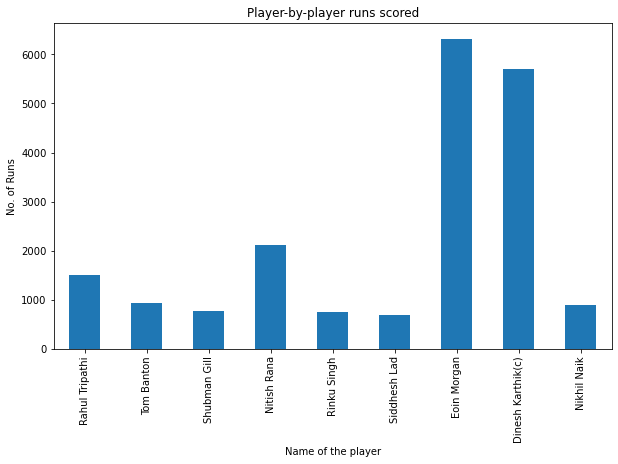

In [2]:
#histograms
BR_df=df.query("Role == 'Opening batsman' or Role == 'Opening Wicketkeeper batsman' or Role == 'Batsman' or Role == 'Wicketkeeper batsman'")
BR_df.set_index("Name", inplace = True) 
BR_df=BR_df.T
players= BR_df.columns.tolist()
df_runs = BR_df.loc['Runs', players]

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

df_runs.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Name of the player') # add to x-label to the plot
plt.ylabel('No. of Runs') # add y-label to the plot
plt.title('Player-by-player runs scored') # add title to the plot

plt.show()

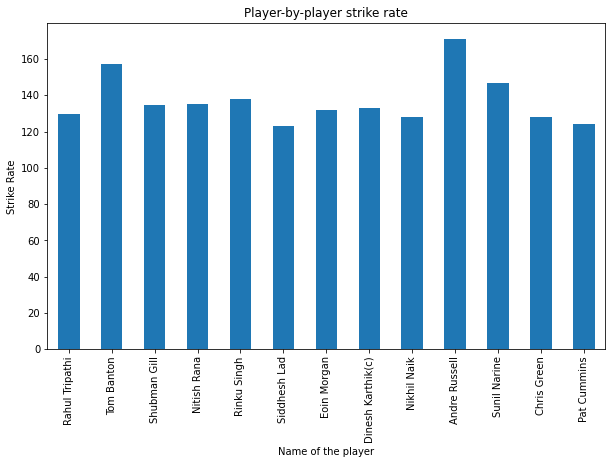

In [3]:
BR_df=df.query("Role == 'All round spin bowler' or Role == 'Allrounder' or Role == 'Opening batsman' or Role == 'Opening Wicketkeeper batsman' or Role == 'Batsman' or Role == 'Wicketkeeper batsman'")
BR_df.set_index("Name", inplace = True) 
BR_df=BR_df.T
players= BR_df.columns.tolist()
df_SR = BR_df.loc['Strike Rate', players]

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

df_SR.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Name of the player') # add to x-label to the plot
plt.ylabel('Strike Rate') # add y-label to the plot
plt.title('Player-by-player strike rate') # add title to the plot

plt.show()

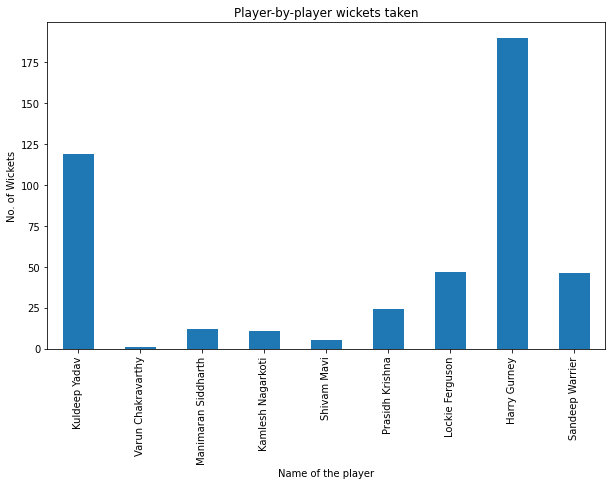

In [4]:
#histograms
BR_df=df.query("Role == 'Bowler' or Role == 'Spin bowler'")
BR_df.set_index("Name", inplace = True) 
BR_df=BR_df.T
players= BR_df.columns.tolist()
df_wickets = BR_df.loc['Wickets', players]

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

df_wickets.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Name of the player') # add to x-label to the plot
plt.ylabel('No. of Wickets') # add y-label to the plot
plt.title('Player-by-player wickets taken') # add title to the plot

plt.show()

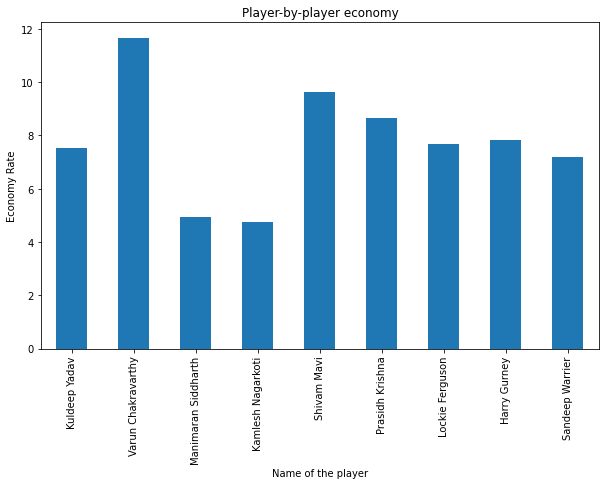

In [5]:
#histograms
BR_df=df.query("Role == 'Bowler' or Role == 'Spin bowler'")
BR_df.set_index("Name", inplace = True) 
BR_df=BR_df.T
players= BR_df.columns.tolist()
df_economy = BR_df.loc['Economy', players]
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

df_economy.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Name of the player') # add to x-label to the plot
plt.ylabel('Economy Rate') # add y-label to the plot
plt.title('Player-by-player economy') # add title to the plot

plt.show()